In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_test.shape

(10000,)

In [7]:
y_train.shape

(60000,)

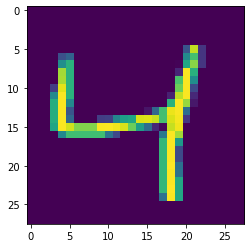

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

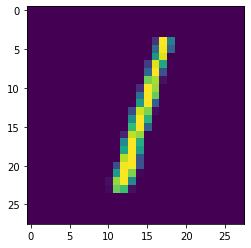

In [9]:
plt.imshow(X_test[2])

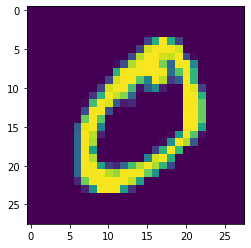

In [10]:
plt.imshow(X_train[1])

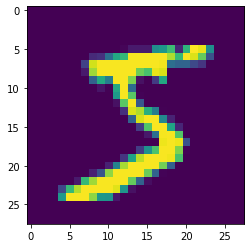

In [11]:
plt.imshow(X_train[0])

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [18]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2846 - accuracy: 0.9181 - val_loss: 0.1483 - val_accuracy: 0.9563
Epoch 2/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1190 - accuracy: 0.9640 - val_loss: 0.1234 - val_accuracy: 0.9626
Epoch 3/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0829 - accuracy: 0.9745 - val_loss: 0.1016 - val_accuracy: 0.9693
Epoch 4/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0618 - accuracy: 0.9806 - val_loss: 0.1192 - val_accuracy: 0.9663
Epoch 5/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0491 - accuracy: 0.9846 - val_loss: 0.0993 - val_accuracy: 0.9732
Epoch 6/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0385 - accuracy: 0.9876 - val_loss: 0.1041 - val_accuracy: 0.9730
Epoch 7/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0313 - accuracy: 0.9901 - val_loss: 0.1172 - val_accuracy:

In [19]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [20]:
y_pred = y_prob.argmax(axis=1)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9782

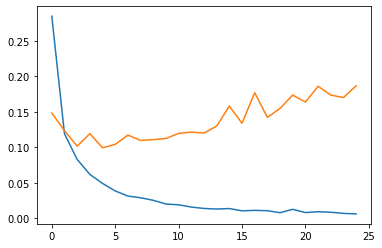

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

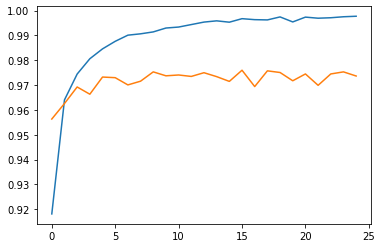

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

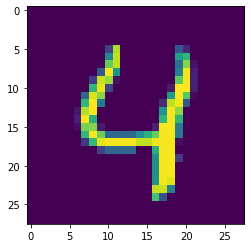

In [24]:
plt.imshow(X_test[4])

In [25]:
model.predict(X_test[4].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 112ms/step


array([4], dtype=int64)

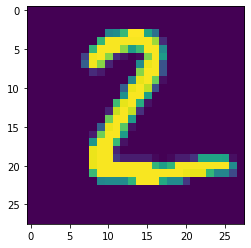

In [26]:
plt.imshow(X_test[1])

In [27]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 32ms/step


array([2], dtype=int64)